In [1]:
import pandas as pd
import numpy as np
import nltk
import prepo_lib as prepo
from nltk.tokenize import sent_tokenize, word_tokenize
import tensorflow as tf
from sklearn.model_selection import train_test_split
from gensim.models.word2vec import Word2Vec

In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

In [3]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from keras.models import Model
from gensim import models
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from keras.callbacks import ModelCheckpoint
import keras.models
from keras.models import model_from_json
from flask import session
from datetime import datetime
import keras.regularizers 

In [4]:
dfmaster = pd.read_csv("data/masterdata.csv")
dfmaster['tokens'] = dfmaster.apply(
    lambda data: nltk.word_tokenize(data['content']), axis=1)
dfmaster['score'].value_counts()

1    7207
5    5044
3    1316
Name: score, dtype: int64

In [44]:
data = pd.read_csv('data/data_train.csv', on_bad_lines='skip')
data_test = pd.read_csv('data/data_test.csv', on_bad_lines='skip')

In [6]:
sen = []
for l in data.score:
    if l == 5 :
        sen.append("Positif")
    elif l == 3 :
        sen.append("Netral")
    else :
        sen.append("Negatif")

data['sentimen']= sen

pos = []
net = []
neg = []
for l in data.sentimen:
    if l == "Positif":
        pos.append(1)
        net.append(0)
        neg.append(0)
    elif l == "Netral":
        pos.append(0)
        net.append(1)
        neg.append(0)
    elif l == "Negatif" :
        pos.append(0)
        net.append(0)
        neg.append(1)

data['Pos']= pos
data['Net']= net
data['Neg']= neg

In [46]:
sen = []
for l in data_test.label:
    if l == 2 :
        sen.append("Positif")
    elif l == 1 :
        sen.append("Netral")
    else :
        sen.append("Negatif")

data_test['sentimen']= sen

In [47]:
#Prepo data train
data['casefolding'] = data['content'].apply(lambda x : prepo.case_folding(x))
data['cleaning'] = data['casefolding'].apply(lambda x : prepo.cleaning(x))
data['slang'] = data['cleaning'].apply(lambda x : prepo.slangword(x))
data['stemming'] = data['slang'].apply(lambda x : prepo.stemming(x))
data['tokenize'] = data['stemming'].apply(lambda x : prepo.tokenize(x))
data

,Unnamed: 0,content,score,sentimen,Pos,Net,Neg,casefolding,cleaning,slang,stemming,tokenize
0,0,Aplikasi pintar,5,Positif,1,0,0,aplikasi pintar,aplikasi pintar,aplikasi pintar,aplikasi pintar,"[aplikasi, pintar]"
1,1,KLAIM SERTIFIKAT VAKSIN RIBET BANGET WAKTU KLI...,1,Negatif,0,0,1,klaim sertifikat vaksin ribet banget waktu kli...,klaim sertifikat vaksin ribet banget waktu kli...,klaim sertifikat vaksin ribet banget waktu kli...,klaim sertifikat vaksin ribet banget waktu kli...,"[klaim, sertifikat, vaksin, ribet, banget, wak..."
2,2,Mantul,5,Positif,1,0,0,mantul,mantul,mantul,mantul,[mantul]
3,3,"aplikasi apaan ini? ko gabisa masuk, percuma min",1,Negatif,0,0,1,"aplikasi apaan ini? ko gabisa masuk, percuma min",aplikasi apaan ini ko gabisa masuk percuma min,aplikasi apaan ini kok enggak bisa masuk percu...,aplikasi apa ini kok enggak bisa masuk percuma...,"[aplikasi, apa, ini, kok, enggak, bisa, masuk,..."
4,4,Kok punya ku Ndak terdaftar ya padahal aku dah...,3,Netral,0,1,0,kok punya ku ndak terdaftar ya padahal aku dah...,kok punya ku ndak terdaftar ya padahal aku dah...,kok punya aku tidak terdaftar ya padahal aku d...,kok punya aku tidak daftar ya padahal aku deh ...,"[kok, punya, aku, tidak, daftar, ya, padahal, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
20127,22273,Update mulu. Mending bener mah,1,Negatif,0,0,1,update mulu. mending bener mah,update mulu mending bener mah,update mulu mending benar mah,update mulu mending benar mah,"[update, mulu, mending, benar, mah]"
20128,22274,Not bad but not good too,3,Netral,0,1,0,not bad but not good too,not bad but not good too,tidak buruk but tidak bagus too,tidak buruk but tidak bagus too,"[tidak, buruk, but, tidak, bagus, too]"
20129,22275,Care healty Your self by Peduli Lindungi,5,Positif,1,0,0,care healty your self by peduli lindungi,care healty your self by peduli lindungi,care healty your self by peduli lindungi,care healty your self by peduli lindung,"[care, healty, your, self, by, peduli, lindung]"
20130,22276,Membantu kelancaran te ntang covid 19,5,Positif,1,0,0,membantu kelancaran te ntang covid 19,membantu kelancaran te ntang covid,membantu kelancaran te ntang covid,bantu lancar te ntang covid,"[bantu, lancar, te, ntang, covid]"


In [48]:
#Prepo data test
data_test['casefolding'] = data_test['content'].apply(lambda x : prepo.case_folding(x))
data_test['cleaning'] = data_test['casefolding'].apply(lambda x : prepo.cleaning(x))
data_test['slang'] = data_test['cleaning'].apply(lambda x : prepo.slangword(x))
data_test['stemming'] = data_test['slang'].apply(lambda x : prepo.stemming(x))
data_test['stopword'] = data_test['stemming'].apply(lambda x : prepo.removeStopword(x))
data_test['tokenize'] = data_test['stopword'].apply(lambda x : prepo.tokenize(x))
data_test

,Unnamed: 0,content,score,label,sentimen,casefolding,cleaning,slang,stemming,stopword,tokenize
0,0,Saya suka,5,2,Positif,saya suka,saya suka,saya suka,saya suka,suka,[suka]
1,1,"Aplikasi sampah, susah masuk sekali nya masuk,...",1,0,Negatif,"aplikasi sampah, susah masuk sekali nya masuk,...",aplikasi sampah susah masuk sekali nya masuk ...,aplikasi sampah susah masuk sekali nya masuk d...,aplikasi sampah susah masuk sekali nya masuk d...,aplikasi sampah susah masuk sekali nya masuk a...,"[aplikasi, sampah, susah, masuk, sekali, nya, ..."
2,2,aplikasi ngeselin,1,0,Negatif,aplikasi ngeselin,aplikasi ngeselin,aplikasi mengesalkan,aplikasi kesal,aplikasi kesal,"[aplikasi, kesal]"
3,3,"Masih nyoba dlu,krna untuk masukin tanggal lah...",3,1,Netral,"masih nyoba dlu,krna untuk masukin tanggal lah...",masih nyoba dlu krna untuk masukin tanggal lah...,masih mencoba dulu karena untuk memasukkan tan...,masih coba dulu karena untuk masuk tanggal lah...,coba dulu masuk tanggal lahir nya mohon baru kak,"[coba, dulu, masuk, tanggal, lahir, nya, mohon..."
4,4,Aplikasi tolol,1,0,Negatif,aplikasi tolol,aplikasi tolol,aplikasi tolol,aplikasi tolol,aplikasi tolol,"[aplikasi, tolol]"
...,...,...,...,...,...,...,...,...,...,...,...
2709,2709,kenapa yaa stlh instal tdk bisa masuk melanjut...,1,0,Negatif,kenapa yaa stlh instal tdk bisa masuk melanjut...,kenapa yaa stlh instal tdk bisa masuk melanjut...,kenapa ya setelah instal tidak bisa masuk mela...,kenapa ya telah instal tidak bisa masuk lanjut...,instal masuk lanjut loginnya beri tnda centang...,"[instal, masuk, lanjut, loginnya, beri, tnda, ..."
2710,2710,Aplikasi gg beres jangn download . Bintang 1 aja,1,0,Negatif,aplikasi gg beres jangn download . bintang 1 aja,aplikasi gg beres jangn download bintang aja,aplikasi tidak beres jangn download bintang saja,aplikasi tidak beres jangn download bintang saja,aplikasi beres jangn download bintang,"[aplikasi, beres, jangn, download, bintang]"
2711,2711,Aplikasi gak guna!! Dari awal daftar sampe sek...,1,0,Negatif,aplikasi gak guna!! dari awal daftar sampe sek...,aplikasi gak guna dari awal daftar sampe sek...,aplikasi tidak guna dari awal daftar sampai se...,aplikasi tidak guna dari awal daftar sampai se...,aplikasi awal daftar sekarang update an tetap ...,"[aplikasi, awal, daftar, sekarang, update, an,..."
2712,2712,sangat berguna,5,2,Positif,sangat berguna,sangat berguna,sangat berguna,sangat guna,sangat,[sangat]


In [49]:
data.to_csv('data/data_train_prepo_non.csv')
data_test.to_csv('data/data_test_prepo_non.csv')

In [50]:
data = pd.read_csv('data/data_train_prepo_non.csv')
data_test = pd.read_csv('data/data_test_prepo_non.csv')

In [44]:
EMBEDDING_DIM = 500
modelSG = Word2Vec(data['tokenize'], vector_size=EMBEDDING_DIM, window=3, min_count=0, sg=1, seed=2)
modelSG.wv.save_word2vec_format('data\model\saved_word2vec_sg.txt',binary=False)
modelCBOW = Word2Vec(data['tokenize'], vector_size=EMBEDDING_DIM, window=3, min_count=0, sg=0, seed=2)
modelCBOW.wv.save_word2vec_format('data\model\saved_word2vec_cbow.txt',binary=False)

In [51]:
#membentuk urutan yang akan menjadi input 
MAX_SEQUENCE_LENGTH = 100
# MAX_NB_WORDS = 20000

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['tokenize'].tolist())
train_word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(data["tokenize"].tolist())
train_cnn_data = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)

test_sequences = tokenizer.texts_to_sequences(data_test["tokenize"].tolist())
test_cnn_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [52]:
text = {"text" : ['Nanya, jika hasil antigen +, apakah tes lanjutan dgn PCR? Yg kedua brp lama masa isolasi pasien covid saat ini?']}
df = pd.DataFrame(text)
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'].tolist())
test_data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
sequences

[[10529,
  10530,
  10531,
  10532,
  10533,
  10534,
  10535,
  10536,
  10537,
  10538,
  10539,
  10540,
  10541,
  10542,
  10543,
  10544,
  10545,
  10546,
  10547]]

In [53]:
#skipgram
embeddings_index = dict()
f = open('data\model\saved_word2vec_sg.txt', 'r', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [42]:
#cbow
embeddings_index = dict()
f = open('data\model\saved_word2vec_cbow.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [54]:
# Prepare embedding matrix from pre-trained model
EMBEDDING_DIM = 500
#embedding_matrix = np.zeros((len(train_word_index)+1,EMBEDDING_DIM))
embedding_matrix = np.random.random((len(train_word_index)+1,EMBEDDING_DIM))

for word, index in train_word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[index] = embedding_vector

label_names = ['Pos', 'Net','Neg']

y_train = data[label_names].values
x_train = train_cnn_data

In [14]:
import pickle
with open('data\model\Saved_Tokenize.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [57]:
#FIX BANGETT
#PARAMETER
FILTERS_SIZE = 50
KERNEL_SIZE = 5
LEARNING_RATE = 0.001

model = Sequential()
model.add(Embedding(input_dim=len(train_word_index)+1, output_dim=EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=True))
model.add(Conv1D(FILTERS_SIZE, KERNEL_SIZE, strides=2, activation='relu', padding='same' , kernel_regularizer=keras.regularizers.l2(0.02)))
#model.add(Conv1D(FILTERS_SIZE, KERNEL_SIZE, strides=1, activation='relu', padding='same' , kernel_regularizer=keras.regularizers.L1(0.01), activity_regularizer=keras.regularizers.L2(0.01)))
model.add(MaxPooling1D(2))
model.add(Dropout(0.05))
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(LEARNING_RATE), metrics=['acc'])

In [55]:
#Hasil Fix
#PARAMETER
FILTERS_SIZE = 50
KERNEL_SIZE = 5
LEARNING_RATE = 0.001

model = Sequential()
model.add(Embedding(input_dim=len(train_word_index)+1, output_dim=EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=True))
#model.add(Conv1D(FILTERS_SIZE, KERNEL_SIZE, strides=1, activation='relu', padding='same' , kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(Conv1D(FILTERS_SIZE, KERNEL_SIZE, strides=1, activation='relu', padding='same' , kernel_regularizer=keras.regularizers.L1(0.01), activity_regularizer=keras.regularizers.L2(0.01)))
#model.add(Conv1D(FILTERS_SIZE, KERNEL_SIZE, strides=1, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(LEARNING_RATE), metrics=['acc'])

In [58]:
from gc import callbacks
from tensorflow.keras.callbacks import ModelCheckpoint

num_epochs = 60
batch_size = 128

es_callback =EarlyStopping(monitor='val_loss', patience=20, verbose=1)
# filePath = "data/model/callback_sentimen_sg.h5"
# m_checkpoint = ModelCheckpoint(filePath, monitor='val_loss',
#                              mode='min',
#                              save_best_only=True,
#                              verbose=1)
# print('Start training model........')

hist = model.fit(x_train, y_train, epochs=num_epochs, validation_split=0.2, shuffle=True , batch_size=batch_size, callbacks=es_callback)

Epoch 1/60
126/126 [==============================] - 37s 285ms/step - loss: 1.4168 - acc: 0.5903 - val_loss: 1.0522 - val_acc: 0.4341
Epoch 2/60
126/126 [==============================] - 35s 277ms/step - loss: 0.9150 - acc: 0.6038 - val_loss: 0.9311 - val_acc: 0.5376
Epoch 3/60
126/126 [==============================] - 35s 278ms/step - loss: 0.8075 - acc: 0.7035 - val_loss: 0.7853 - val_acc: 0.7052
Epoch 4/60
126/126 [==============================] - 34s 273ms/step - loss: 0.7371 - acc: 0.7462 - val_loss: 0.7579 - val_acc: 0.7363
Epoch 5/60
126/126 [==============================] - 35s 276ms/step - loss: 0.6997 - acc: 0.7687 - val_loss: 0.7398 - val_acc: 0.7368
Epoch 6/60
126/126 [==============================] - 35s 275ms/step - loss: 0.6701 - acc: 0.7848 - val_loss: 0.7669 - val_acc: 0.7117
Epoch 7/60
126/126 [==============================] - 35s 278ms/step - loss: 0.6421 - acc: 0.7905 - val_loss: 0.7228 - val_acc: 0.7383
Epoch 8/60
126/126 [==============================] - 3

In [60]:
predictions = model.predict(test_cnn_data, batch_size=8, verbose=2)
print(predictions)

340/340 - 2s - 2s/epoch - 6ms/step
[[8.8722098e-01 6.1600674e-02 5.1178254e-02]
 [6.4696241e-07 1.4729664e-04 9.9985206e-01]
 [3.2349389e-02 1.1318316e-01 8.5446745e-01]
 ...
 [8.5323290e-06 7.3140301e-04 9.9926001e-01]
 [8.3722132e-01 8.6853534e-02 7.5925127e-02]
 [7.7013731e-01 1.1944228e-01 1.1042043e-01]]


In [61]:
review = pd.DataFrame(data_test.stopword)
lab = pd.DataFrame(data_test.sentimen)

In [62]:
text = review.values
lb = lab.values
print(lb)

[['Positif']
 ['Negatif']
 ['Negatif']
 ...
 ['Negatif']
 ['Positif']
 ['Positif']]


In [63]:
class_category = ['POSITIF','NETRAL','NEGATIF']

In [64]:
rev = []
lbl = []
pred = []
for i in range(predictions.shape[0]):
    review = text[i]
    lbe = lb[i]
    pre = class_category[predictions[i].argmax()]
    
    print(str( i)+" "+pre+" "+lbe+" | "+str(review))
    rev.append(review)
    lbl.append(lbe)
    pred.append(pre)

b = {'content' : rev, 'label' : lbl, 'predict' : pred}
df = pd.DataFrame(b)


["0 POSITIF Positif | ['suka']"]
["1 NEGATIF Negatif | ['aplikasi sampah susah masuk sekali nya masuk arah masuk tanggal lahir gilir masuk aplikasi pedulilindungi aplikasi sangat bagus']"]
["2 NEGATIF Negatif | ['aplikasi kesal']"]
["3 NEGATIF Netral | ['coba dulu masuk tanggal lahir nya mohon baru kak']"]
["4 NEGATIF Negatif | ['aplikasi tolol']"]
["5 POSITIF Positif | ['baik ecek keluarga kartu keluarga jadi biar lebih efisien mendownload tiap perangkat per ktp terimakasih']"]
["6 POSITIF Positif | ['sangat bantu tiap jalan kena status wilayah']"]
["7 NEGATIF Negatif | ['daftar vaksin pertama sertifikat temu']"]
["8 NEGATIF Negatif | ['verifikasi susah jrlek kesel gwa']"]
["9 NEGATIF Negatif | ['aplikasi buat mana sih error mulu tiap scan luar radius mulu']"]
['10 POSITIF Positif | [nan]']
["11 NEGATIF Negatif | ['kok sekarang eror sih masa laku cekout cekout sendiri']"]
["12 NEGATIF Negatif | ['aplikasi sempurna rilis banyak bug sertifikat vaksin muncul sekarang padahal vaksin awal'

In [65]:
df.to_csv('data/hasil_prediksi_non.csv')

In [66]:
labels = ['Positif','Netral','Negatif']
prediction_labels=[]
for p in predictions:
    prediction_labels.append(labels[np.argmax(p)])

In [67]:
ab = 0
ac = 0
aa = 0
for i in (lb):
    if i == 'Positif':
        ab = ab+1
    if i == 'Negatif':
        aa = aa+1
    if i == 'Netral':
        ac = ac+1
print ("netral : "+str(ac))
print ("negative : "+str(aa))
print ("postive : "+str(ab))

netral : 380
negative : 1450
postive : 884


In [68]:
from sklearn.metrics import confusion_matrix
labels = ['Negatif','Netral','Positif']
cf_kategori = pd.DataFrame(
    data=confusion_matrix(lb, prediction_labels, labels=labels),
    columns=labels,
    index=labels
)
print(cf_kategori)

         Negatif  Netral  Positif
Negatif     1264       0      186
Netral       212       0      168
Positif      125       0      759


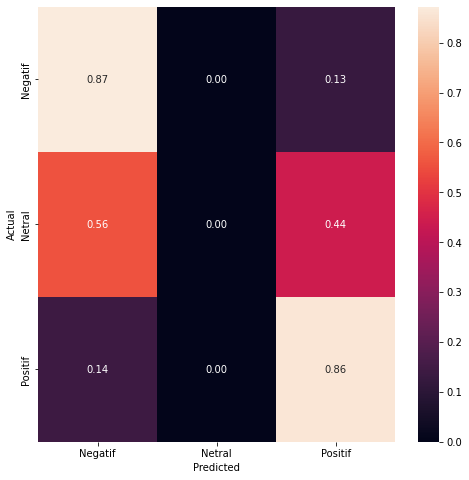

In [69]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(lb, prediction_labels)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [71]:
from sklearn.metrics import classification_report
label = ['Positif','Negatif','Netral']
print(classification_report(data_test['sentimen'].tolist(),prediction_labels,labels=label))

              precision    recall  f1-score   support

     Positif       0.68      0.86      0.76       884
     Negatif       0.79      0.87      0.83      1450
      Netral       0.00      0.00      0.00       380

    accuracy                           0.75      2714
   macro avg       0.49      0.58      0.53      2714
weighted avg       0.64      0.75      0.69      2714



c:\Users\ANDRA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ANDRA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ANDRA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

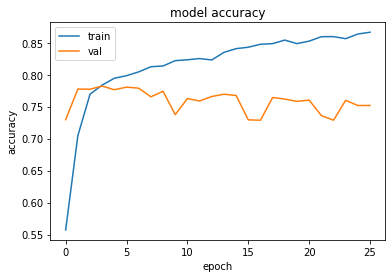

In [50]:
# summarize hist for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


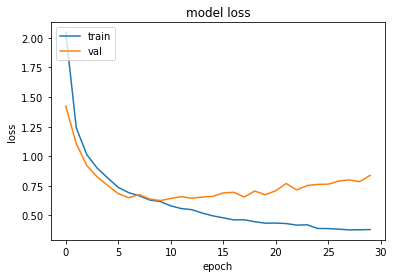

In [ ]:
# summarize hist for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
import pickle
# with open('data\model\Saved_Tokenize.pickle', 'wb') as handle:
#     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

model_json = model.to_json()
with open('data\model\saved_model_sentimen_sg.json','w') as json_file:
    json_file.write(model_json)

model.save_weights("data\model\saved_model_sentimen_sg.h5")
print("Model saved to disk")